# Cross Validation

## Holdout crooss Validation: Traditional Train_test_split

This method is the simplest cross-validation technique among all. In this method, we need to remove a subset of the training data and use it to get prediction results by training it on the rest part of the dataset.

The error that occurs in this process tells how well our model will perform with the unknown dataset. Although this approach is simple to perform, it still faces the issue of high variance, and it also produces misleading results sometimes.

Comparison of Cross-validation to train/test split in Machine Learning
Train/test split: The input data is divided into two parts, that are training set and test set on a ratio of 70:30, 80:20, etc. It provides a high variance, which is one of the biggest disadvantages.
Training Data: The training data is used to train the model, and the dependent variable is known.
Test Data: The test data is used to make the predictions from the model that is already trained on the training data. This has the same features as training data but not the part of that.
Cross-Validation dataset: It is used to overcome the disadvantage of train/test split by splitting the dataset into groups of train/test splits, and averaging the result. It can be used if we want to optimize our model that has been trained on the training dataset for the best performance. It is more efficient as compared to train/test split as every observation is used for the training and testing both.

**Data_Set** 

1. 70 percent Train
2. 30 percentage Test



### KFold cross Validation:

K-fold cross-validation approach divides the input dataset into K groups of samples of equal sizes. These samples are called folds. For each learning set, the prediction function uses k-1 folds, and the rest of the folds are used for the test set. This approach is a very popular CV approach because it is easy to understand, and the output is less biased than other methods.

        **The steps for k-fold cross-validation are:**

Split the input dataset into K groups
For each group:
Take one group as the reserve or test data set.
Use remaining groups as the training dataset
Fit the model on the training set and evaluate the performance of the model using the test set.
Let's take an example of 5-folds cross-validation. So, the dataset is grouped into 5 folds. On 1st iteration, the first fold is reserved for test the model, and rest are used to train the model. On 2nd iteration, the second fold is used to test the model, and rest are used to train the model. This process will continue until each fold is not used for the test fold.

**Data Set** ROWS 0 to 300 

1. From 200 to 300 ROWS goes for train and test,
2. then 100 to 200 ROWS will be train and test,
3. 0 to 100 will go for training and test,

Here n=3, It will calculate the mean accuracy of (n1+n2+n3)/3 default=5*

### Leave one out Cross Validation:[LOOCV]

This method is similar to the leave-p-out cross-validation, but instead of p, we need to take 1 dataset out of training. It means, in this approach, for each learning set, only one datapoint is reserved, and the remaining dataset is used to train the model. This process repeats for each datapoint. Hence for n samples, we get n different training set and n test set. It has the following features:

In this approach, the bias is minimum as all the data points are used.
The process is executed for n times; hence execution time is high.
This approach leads to high variation in testing the effectiveness of the model as we iteratively check against one data point.


**DATA SET**

1. one by one row will go for training one by one...
ex: total rows 0 to 1000
1 row goes for test and 999 will go testing 

In [1]:
# loaing import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import scientific Python library
import scipy.stats
from scipy.stats import zscore, ttest_1samp, ttest_ind, chi2_contingency, chisquare, percentileofscore

# import machine learning library from scikit learn
import sklearn
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, cross_validate
from sklearn.linear_model import LogisticRegression

# metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

# model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

# import warnings to filter warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading datasets
from sklearn.datasets import load_iris
ds=load_iris()

In [3]:
ds

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
ds.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
ds.values()

dict_values([array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
 

In [6]:
df=pd.DataFrame(data=ds.data,columns=ds.feature_names)
df['Target']=ds.target

In [7]:
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
# rename target column as target
df.rename(columns={"Target":"target"},inplace=True)

In [9]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [10]:
print("Shape {}\ncolumns {}, rows {},\nSize {} \nDimension {}".format(df.shape,df.shape[1],df.shape[0],df.size,df.ndim))

Shape (150, 5)
columns 5, rows 150,
Size 750 
Dimension 2


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [12]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [13]:
df.notnull().sum()

sepal length (cm)    150
sepal width (cm)     150
petal length (cm)    150
petal width (cm)     150
target               150
dtype: int64

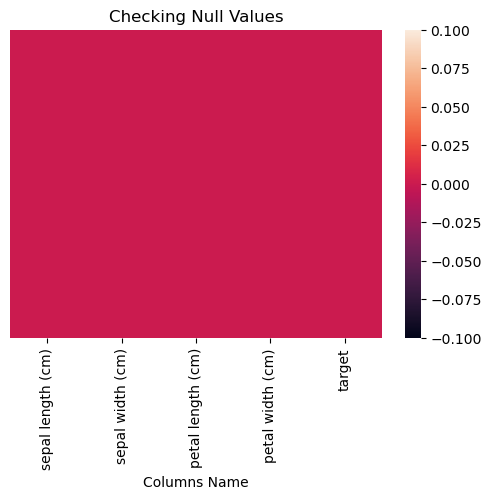

In [14]:
plt.figure(figsize=(6,4))
plt.title("Checking Null Values")
sns.heatmap(df.isnull(),yticklabels=False)
plt.xlabel("Columns Name")
plt.show()

# Multivariate Graph

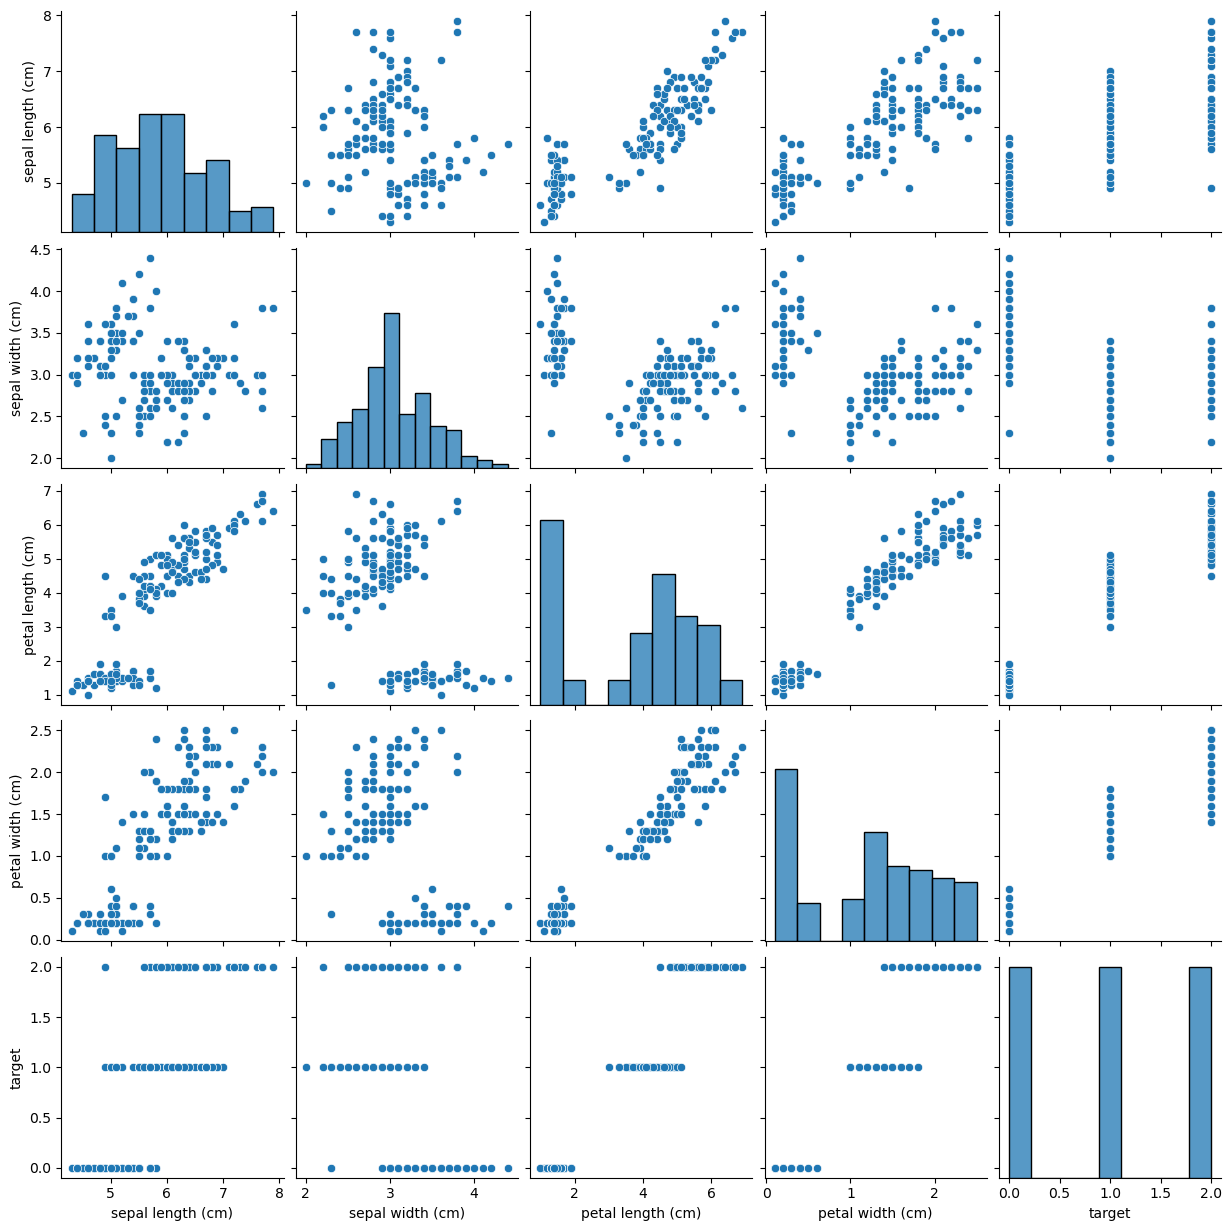

In [15]:
sns.pairplot(df)

# Descriptive 

In [16]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


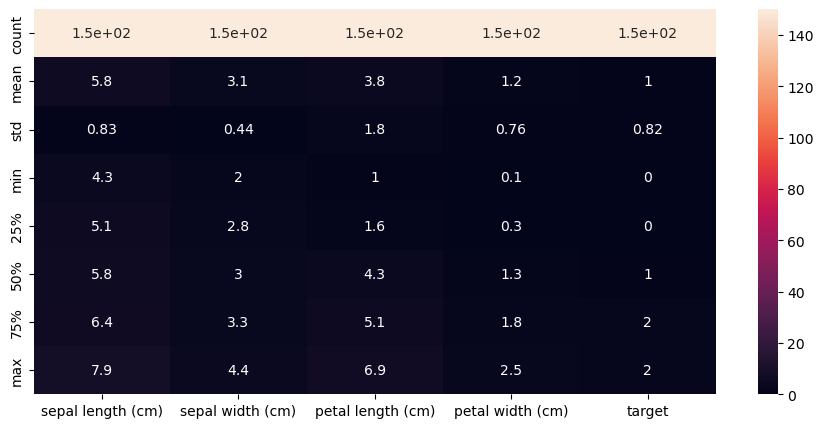

In [17]:
plt.figure(figsize=(11,5))
sns.heatmap(df.describe(),annot=True)
plt.show()

# Correlation Graph

In [18]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


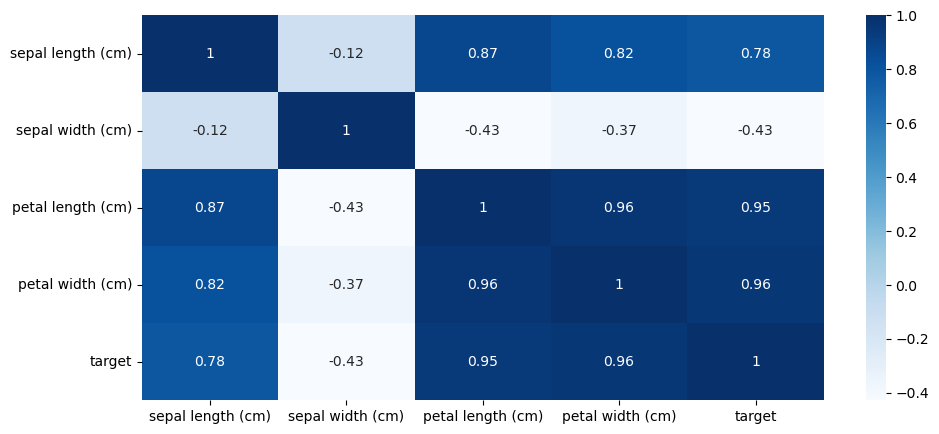

In [19]:
plt.figure(figsize=(11,5))
sns.heatmap(df.corr(),annot=True,linecolor='b',cmap='Blues')
plt.show()

# Train Test

In [20]:
x=df.iloc[:,:-1]
x.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [21]:
y=df.iloc[:,-1:]
y.head(3)

,target
0,0
1,0
2,0


In [22]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=22,random_state=43)

print("Training Shape:\n------------------------------------\n\
1. Train_X :{} \n2. Train_Y :{}".format(train_x.shape,train_y.shape))
print("\n\nTesting Shape :\n----------------------------------\n\
1. Testing_x:{} \n2. Testing_y:{}".format(test_x.shape,test_y.shape))

Training Shape:
------------------------------------
1. Train_X :(128, 4) 
2. Train_Y :(128, 1)


Testing Shape :
----------------------------------
1. Testing_x:(22, 4) 
2. Testing_y:(22, 1)


MODEL:  MultinomialNB()
Training Score:  0.9609375
Testing Score:  1.0 
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         6

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22
 
Confusion_Matrix:
 [[9 0 0]
 [0 7 0]
 [0 0 6]]


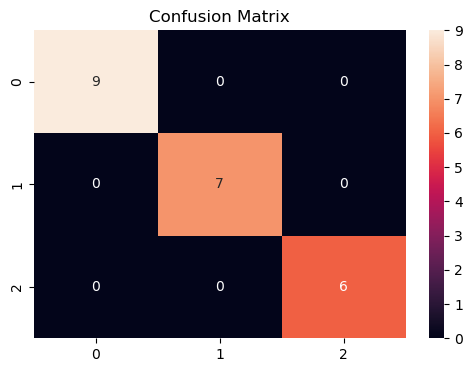




MODEL:  DecisionTreeClassifier()
Training Score:  1.0
Testing Score:  1.0 
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         6

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22
 
Confusion_Matrix:
 [[9 0 0]
 [0 7 0]
 [0 0 6]]


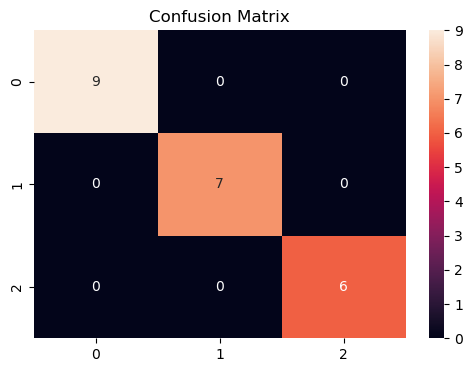




MODEL:  SVC()
Training Score:  0.96875
Testing Score:  0.9545454545454546 
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.88      1.00      0.93         7
           2       1.00      0.83      0.91         6

    accuracy                           0.95        22
   macro avg       0.96      0.94      0.95        22
weighted avg       0.96      0.95      0.95        22
 
Confusion_Matrix:
 [[9 0 0]
 [0 7 0]
 [0 1 5]]


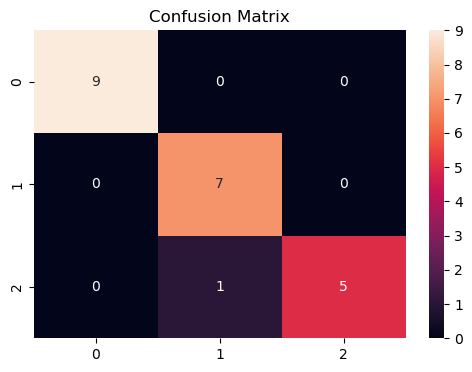




MODEL:  KNeighborsClassifier()
Training Score:  0.96875
Testing Score:  1.0 
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         6

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22
 
Confusion_Matrix:
 [[9 0 0]
 [0 7 0]
 [0 0 6]]


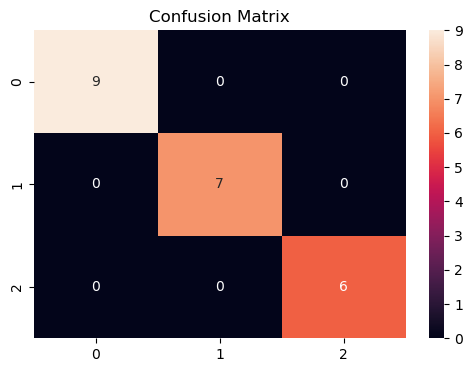

In [23]:
# creating model Testing

mnb=MultinomialNB()
dtc=DecisionTreeClassifier()
svc=SVC()
knn=KNeighborsClassifier()

list=[mnb,dtc,svc,knn]

for i in list:
    i.fit(train_x,train_y)
    print("MODEL: ",i)
    print("Training Score: ",i.score(train_x,train_y))
    predict_test=i.predict(test_x)
    print("Testing Score: ",accuracy_score(test_y,predict_test),"\nClassification_report:\n",classification_report(test_y,predict_test),"\nConfusion_Matrix:\n",confusion_matrix(test_y,predict_test))
    
    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(test_y,predict_test),annot=True)
    plt.title("Confusion Matrix")
    plt.show()
    print("\n\n")

# Cross validation

In [24]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(mnb,x,y,cv=5)
print("Score")
print("Score Mean ",score.mean())
print("Score Std  ",score.std()) # good score as mean is more deviated and std is least

Score
Score Mean  0.9533333333333334
Score Std   0.04521553322083511


In [25]:
# Support vector machine

score=cross_val_score(svc,x,y,cv=5)
print(score)
print("Mean Score: ",score.mean(),"Standard Devaition: ",score.std()) # model works better

[0.96666667 0.96666667 0.96666667 0.93333333 1.        ]
Mean Score:  0.9666666666666666 Standard Devaition:  0.02108185106778919


In [26]:
score=cross_val_score(knn,x,y,cv=5)
print(score)
print("Mean Score",score.mean(),"Standard Deviation: ",score.std()) # its far better as mean is more and std is less

[0.96666667 1.         0.93333333 0.96666667 1.        ]
Mean Score 0.9733333333333334 Standard Deviation:  0.02494438257849294


In [27]:
score=cross_val_score(dtc,x,y,cv=5)
print(score)
print("Score Mean: ",score.mean(),"Score_Std: ",score.std())  # its works 

[0.96666667 0.96666667 0.9        0.96666667 1.        ]
Score Mean:  0.9600000000000002 Score_Std:  0.03265986323710903


## Observation
- Knn works the best as mean is approx 1 and std is least

# KFold : 

we need change the cv value as cross fold

In [30]:
from sklearn.model_selection import KFold
# kfold=KFold(5)
kfold=KFold(5)
score=cross_val_score(knn,x,y,cv=kfold)
print(score)
print("Mean_Score: ",score.mean(),"Standard_deviation: ",score.std())

# we can see the std has gone down

[1.         1.         0.83333333 0.93333333 0.8       ]
Mean_Score:  0.9133333333333333 Standard_deviation:  0.0832666399786453


In [36]:
from sklearn.model_selection import cross_val_score
# KFOLd

kf=KFold(8)
score=cross_val_score(mnb,x,y,cv=kf)
print(score)
print("Score Mean ",score.mean())
print("Score Std  ",score.std()) # good score as mean is more deviated and std is least

[1.         1.         0.68421053 0.         0.         0.31578947
 0.         0.        ]
Score Mean  0.375
Score Std   0.42468621298717135


### LEAVE ONE ROW OUT CROSS VALIDATION 

In [39]:
#LOOCV

from sklearn.model_selection import LeaveOneOut

loocv=LeaveOneOut()

score=cross_val_score(knn,x,y,cv=loocv)
print(score)
print("Mean Score:",score.mean(),"Standard Deviation:",score.std())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Mean Score: 0.9666666666666667 Standard Deviation: 0.17950549357115014


## PREDICTION

In [45]:
import numpy as np

s=np.array([7.7,2.6,6.9,2.3]) # sample taken where target==2

# it shows 4 rows and zero column
print("1D data",s.shape)

# we will change it 1 row many column
s=s.reshape(1,-1)
print("Shape",s.shape)

1D data (4,)
Shape (1, 4)


In [46]:
# predict with the help of svc as the mean score is best and std is least
predict_value=svc.predict(s)

In [47]:
predict_value # shows that its belong to the 2nd group

array([2])

# Making user defined Function to predict data

In [48]:
def test_predict(s):
    s=s.reshape(1,-1)# will convert the array to 1 row and many columns
    pred_val=svc.predict(s)
    return pred_val

In [50]:
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
57,4.9,2.4,3.3,1.0,1
69,5.6,2.5,3.9,1.1,1
51,6.4,3.2,4.5,1.5,1
91,6.1,3.0,4.6,1.4,1
101,5.8,2.7,5.1,1.9,2


In [58]:
s=np.array([0.7,0.1,2.1,1.4])
test_predict(s)

array([0])

# Serialization and De-serialization
----------------------------------

1. Serialization:
- Taking out the object file out of the jupiter notebook for prediction

2. De-serialization:
- taking the object file back to jupiter notebook

# Save the Best Model

### First Method

In [59]:
# import joblib library 
import joblib

# saving model
joblib.dump(svc,'svcfile.obj')

['svcfile.obj']

In [60]:
# Loading back the model
calling_back=joblib.load('svcfile.obj')

#loading to save
calling_back.predict(test_x)

array([0, 0, 1, 1, 2, 0, 2, 1, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 2, 2, 0, 0])

## Second Method

In [61]:
# import pickle
import pickle

# save model
filename="pickle_dumb_svc.obj"
pickle.dump(svc,open(filename,'wb')) # save file--> pickle.dump(model_instance,open(filename,'wb'))

In [62]:
# loading back model in read binary
calling_svc_model=pickle.load(open("pickle_dumb_svc.obj",'rb'))

# making model predict on test data
calling_svc_model.predict(test_x)

array([0, 0, 1, 1, 2, 0, 2, 1, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 2, 2, 0, 0])